In [18]:
!pip install seaborn

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import pandas as pd

In [21]:
df=pd.read_csv('../preprocessed/amlodipine.csv')

In [22]:
df['Anxiety and depression ']

0      1
1      1
2      1
3      1
4      1
5      1
6      2
7      2
8      1
9      1
10     1
11     1
12     2
13     1
14     2
15     2
16     1
17     1
18     1
19     1
20     1
21     1
22     2
23     1
24     1
25     2
26     1
27     2
28     2
29     1
      ..
176    2
177    4
178    3
179    4
180    4
181    3
182    3
183    4
184    3
185    4
186    3
187    2
188    2
189    3
190    2
191    3
192    4
193    3
194    2
195    3
196    3
197    4
198    2
199    3
200    4
201    3
202    3
203    2
204    4
205    3
Name: Anxiety and depression , dtype: int64

In [23]:
%matplotlib inline
def plot(sub):
    cols = sub.columns
    sns.lmplot(cols[0],cols[1],data=df,hue='Groups',fit_reg=False)

In [24]:
features = ['Plasma renin ','Mobility','Anxiety and depression ','VAS','Vasopressin ','VMA']

In [ ]:
for i in features:
    for j in features:
        if i == j:
            continue
        sub = [i,j]
        plot(df[sub])
        plt.savefig('../images/All comparisons/'+i+' vs '+j+'.png')

In [ ]:
sns.set_style('darkgrid')
sns.lmplot('Anxiety and depression ','VMA',df)
plt.savefig('../images/Anxiety and VMA.png')

In [93]:
data = df.values
label = data[:,0]
X = data[:, 1:data.shape[1]-1]
# Dataset has Label at index 1

In [94]:
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

In [135]:
n_neighbors = 8
n_components = 2

In [136]:
from sklearn import manifold
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)

In [107]:
df['x_']=Y[:,0]
df['y_']=Y[:,1]

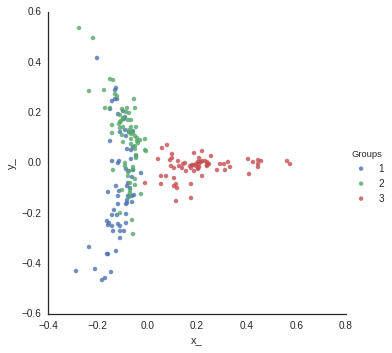

In [137]:
sns.set_style('white')
#sns.set_style('ticks',{"xtick.major.size": 10, "ytick.major.size": 10})
sns.lmplot('x_','y_',data=df,hue='Groups',fit_reg=False)
plt.savefig('../images/manifold_se.png')